In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

In [51]:
# set parameters
Npointings = 60
fov = 0.73 # deg
xlim = (0., 2.) # deg
ylim = (0., 2.) # deg
xmin = xlim[0] + 0.5 * fov # deg
xmax = xlim[1] - 0.5 * fov # deg
ymin = ylim[0] + 0.5 * fov # deg
ymax = ylim[1] - 0.5 * fov # deg

In [52]:
# A: simplest plan: 60 pointings; total random
A_xs = xmin + (xmax - xmin) * np.random.uniform(size=60)
A_ys = ymin + (ymax - ymin) * np.random.uniform(size=60)

In [53]:
xp = fov * np.array([-0.5, 0.5, 0.5, -0.5, -0.5])
yp = fov * np.array([-0.5, -0.5, 0.5, 0.5, -0.5])
def plot_one_field(x, y):
    plt.plot(x + xp, y + yp, "r-", alpha=0.75)

In [54]:
def plot_one_survey(name, xs, ys):
    plt.figure(figsize=(5,5))
    for x, y in zip(xs, ys):
        plot_one_field(x, y)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(name)

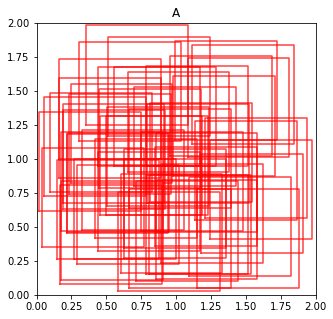

In [55]:
plot_one_survey("A", A_xs, A_ys)

In [58]:
# B: More interesting plan: 58 pointings; plaid pattern (good for self-cal)
nx, ny = 5, 4
B_xs = np.outer(np.linspace(xmin, xmax, nx), np.ones(ny)).flatten()
B_ys = np.outer(np.linspace(ymin, ymax, ny), np.ones(nx)).T.flatten()
nx, ny = 4, 5
B_xs = np.append(B_xs, np.outer(np.linspace(xmin, xmax, nx), np.ones(ny)).flatten())
B_ys = np.append(B_ys, np.outer(np.linspace(ymin, ymax, ny), np.ones(nx)).T.flatten())
nx, ny = 6, 3
B_xs = np.append(B_xs, np.outer(np.linspace(xmin, xmax, nx), np.ones(ny)).flatten())
B_ys = np.append(B_ys, np.outer(np.linspace(ymin, ymax, ny), np.ones(nx)).T.flatten())

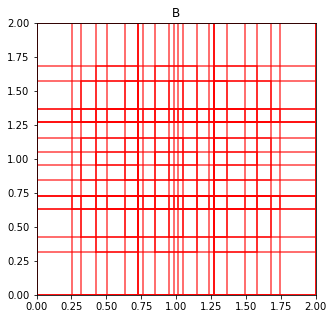

In [59]:
plot_one_survey("B", B_xs, B_ys)

In [72]:
# C: ultra-uniform plan: 64 pointings, far more uniform than Poisson
nx, ny = 8, 8
C_xs = np.outer(np.linspace(xmin, xmax, nx), np.ones(ny)).flatten()
C_ys = np.outer(np.linspace(ymin, ymax, ny), np.ones(nx)).T.flatten()
C_xs += ((xmin - xmax) / nx) * (0.5 - np.random.uniform(size=C_xs.shape))
C_ys += ((ymin - ymax) / ny) * (0.5 - np.random.uniform(size=C_ys.shape))
C_xs = np.clip(C_xs, xmin, xmax)
C_ys = np.clip(C_ys, ymin, ymax)

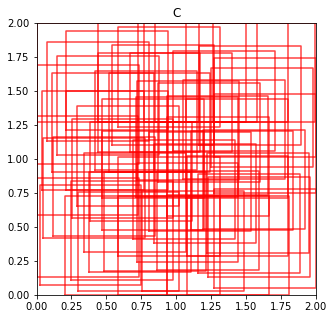

In [73]:
plot_one_survey("C", C_xs, C_ys)